In [1]:
import torch
from torchinfo import summary

model =  torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


Using cache found in /Users/egorlogutov/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-4-22 Python-3.11.9 torch-2.2.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [2]:
summary(model)

Layer (type:depth-idx)                                  Param #
AutoShape                                               --
├─DetectMultiBackend: 1-1                               --
│    └─DetectionModel: 2-1                              --
│    │    └─Sequential: 3-1                             (7,225,885)
Total params: 7,225,885
Trainable params: 0
Non-trainable params: 7,225,885

image 1/1: 664x1268 1 person, 1 keyboard, 1 cell phone, 1 vase
Speed: 17.3ms pre-process, 86.5ms inference, 0.6ms NMS per image at shape (1, 3, 352, 640)


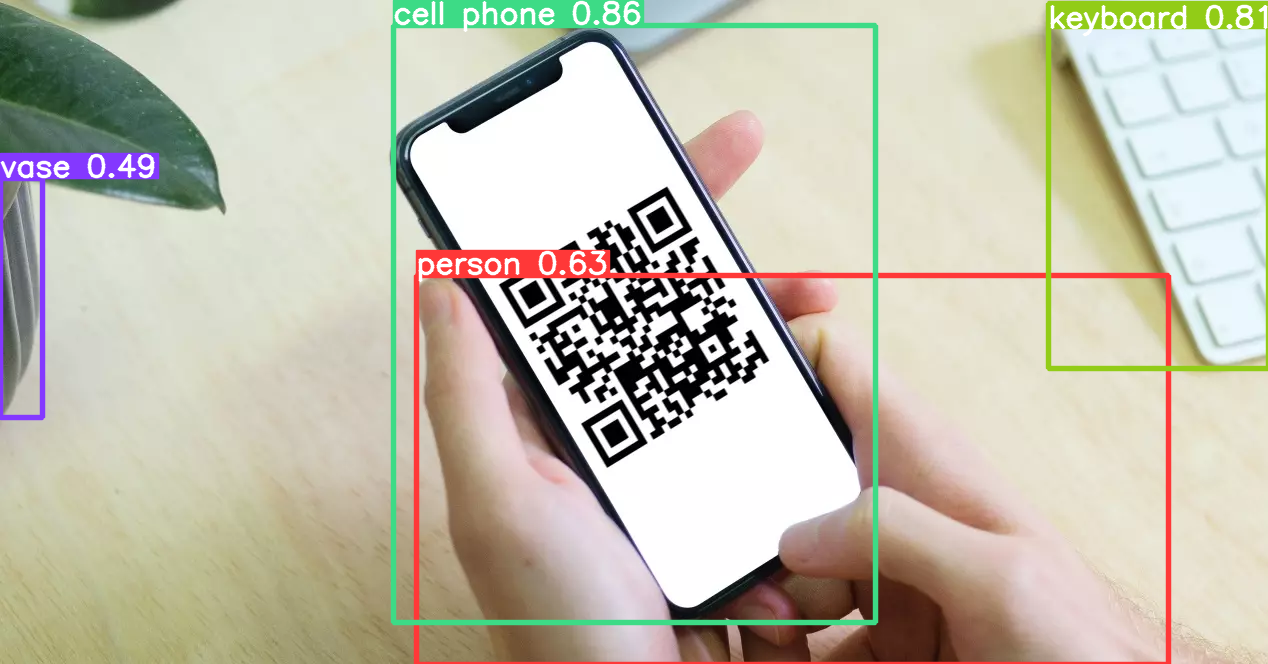

,xmin,ymin,xmax,ymax,confidence,class,name
0,393.217712,25.220055,875.090149,622.650757,0.860705,67,cell phone
1,1048.327393,3.853852,1268.000000,368.873291,0.814957,66,keyboard
2,416.036652,275.647095,1168.359253,664.000000,0.626069,0,person
3,0.000000,178.810715,42.140896,417.103943,0.492708,75,vase


In [5]:
# Images
#imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images
imgs = ['testImages/qr.webp']
# Inference
results = model(imgs)

# Results
results.print()
results.show()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

In [18]:
#Сохранение всей модели
torch.save(model, 'YOLO_full_model.pth')


#Сохранение модели в формате TorchScript
#cripted_model = torch.jit.script(model)
#torch.jit.save(scripted_model, 'YOLO_model_scripted.pt')
#TORCH SCRIPT с YOLO не работает нужно модифицировать код самой модели


NotSupportedError: Compiled functions can't take variable number of arguments or use keyword-only arguments with defaults:
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py", line 488
    def __exit__(self, *exc_info):
                       ~~~~~~~~~ <--- HERE
        if not self._entered:
            raise RuntimeError("Cannot exit %r without entering first" % self)
'__torch__.warnings.catch_warnings' is being compiled since it was called from 'SPPF.forward'
  File "/Users/egorlogutov/.cache/torch/hub/ultralytics_yolov5_master/models/common.py", line 321
        """Processes input through a series of convolutions and max pooling operations for feature extraction."""
        x = self.cv1(x)
        with warnings.catch_warnings():
             ~~~~~~~~~~~~~~~~~~~~~~~ <--- HERE
            warnings.simplefilter("ignore")  # suppress torch 1.9.0 max_pool2d() warning
            y1 = self.m(x)


In [23]:
#Сохранение модели в формате TorchTrase
input_trase_example = (torch.randn(1, 3, 640, 640) / 255.0)  # Батч из 4 RGB изображений 640x640 с нормализацией значений
traced_model = torch.jit.trace(model, input_trase_example)
torch.jit.save(traced_model, 'YOLO_model_traced.pt')

/Users/egorlogutov/.cache/torch/hub/ultralytics_yolov5_master/models/yolo.py:100: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if self.dynamic or self.grid[i].shape[2:4] != x[i].shape[2:4]:
/Users/egorlogutov/.cache/torch/hub/ultralytics_yolov5_master/models/yolo.py:100: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if self.dynamic or self.grid[i].shape[2:4] != x[i].shape[2:4]:
